In [135]:
import keras
import os
#import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np 
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D, AveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [136]:
# training augmentation configuration
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# validation and test augmentation configuration with rescaling
test_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)

In [137]:
# Create training_data, validation_data and test_data
training_data=train_datagen.flow_from_directory('./train', target_size=(64,64), batch_size=8, class_mode='binary')
validation_data=validation_datagen.flow_from_directory('./val',target_size=(64,64),  batch_size=8,class_mode='binary')
test_data=test_datagen.flow_from_directory('./test', target_size=(64,64),  batch_size=8,class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [138]:
cnn_model=Sequential()
# The first convolution and pooling
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
cnn_model.add(MaxPooling2D(2,2))


#the second convolution and pooling
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dense(units=1,activation='sigmoid'))


In [139]:
cnn_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [141]:
history=cnn_model.fit_generator(training_data, steps_per_epoch=len(training_data)//8, epochs=50, validation_data=test_data)

Epoch 1/50
81/81 [==============================] - 20s 252ms/step - loss: 0.4937 - accuracy: 0.7731 - val_loss: 0.5590 - val_accuracy: 0.7115
Epoch 2/50
81/81 [==============================] - 20s 242ms/step - loss: 0.3587 - accuracy: 0.8611 - val_loss: 0.5643 - val_accuracy: 0.7276
Epoch 3/50
81/81 [==============================] - 20s 247ms/step - loss: 0.3794 - accuracy: 0.8380 - val_loss: 0.4570 - val_accuracy: 0.8189
Epoch 4/50
81/81 [==============================] - 20s 243ms/step - loss: 0.3228 - accuracy: 0.8750 - val_loss: 1.0729 - val_accuracy: 0.6987
Epoch 5/50
81/81 [==============================] - 19s 241ms/step - loss: 0.2940 - accuracy: 0.8889 - val_loss: 0.7620 - val_accuracy: 0.7356
Epoch 6/50
81/81 [==============================] - 20s 246ms/step - loss: 0.2655 - accuracy: 0.9136 - val_loss: 0.9196 - val_accuracy: 0.7067
Epoch 7/50
81/81 [==============================] - 20s 244ms/step - loss: 0.2911 - accuracy: 0.8904 - val_loss: 0.4251 - val_accuracy: 0.8269

In [142]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

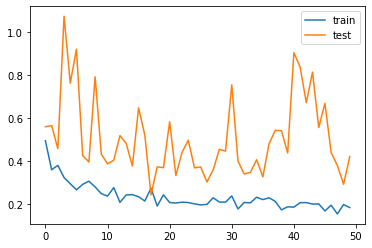

In [143]:
# Evaluate the model
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

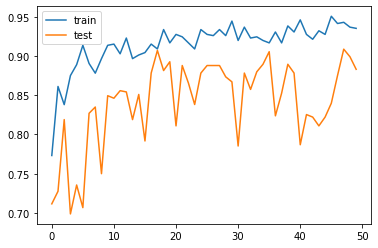

In [144]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [145]:
# add 2 more layers to train the CNN

cnn_model=Sequential()
# The first convolution and pooling
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
cnn_model.add(MaxPooling2D(2,2))


#the second convolution and pooling
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))


#the third convolution and pooling
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.1))

#the fourth convolution and pooling
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.1))


cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dense(units=1,activation='sigmoid'))

In [146]:
cnn_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [147]:
history2=cnn_model.fit_generator(training_data, steps_per_epoch=len(training_data)//8, epochs=100, validation_data=test_data)

Epoch 1/100
81/81 [==============================] - 19s 237ms/step - loss: 0.5765 - accuracy: 0.7608 - val_loss: 0.8346 - val_accuracy: 0.6250
Epoch 2/100
81/81 [==============================] - 19s 231ms/step - loss: 0.5907 - accuracy: 0.7392 - val_loss: 0.6695 - val_accuracy: 0.6250
Epoch 3/100
81/81 [==============================] - 19s 233ms/step - loss: 0.5807 - accuracy: 0.7469 - val_loss: 0.6614 - val_accuracy: 0.6250
Epoch 4/100
81/81 [==============================] - 19s 235ms/step - loss: 0.5691 - accuracy: 0.7392 - val_loss: 0.7784 - val_accuracy: 0.6250
Epoch 5/100
81/81 [==============================] - 19s 240ms/step - loss: 0.4909 - accuracy: 0.7531 - val_loss: 0.4139 - val_accuracy: 0.8494
Epoch 6/100
81/81 [==============================] - 19s 231ms/step - loss: 0.4179 - accuracy: 0.8056 - val_loss: 1.8581 - val_accuracy: 0.6314
Epoch 7/100
81/81 [==============================] - 20s 246ms/step - loss: 0.4538 - accuracy: 0.8194 - val_loss: 0.4039 - val_accuracy:

In [150]:
cnn_model.save('cnn_model.h5')

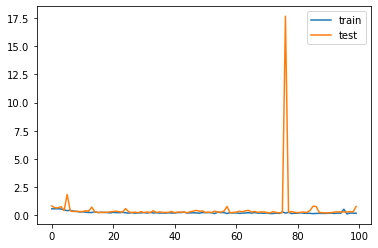

In [148]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Validation and training loss')
plt.legend()
plt.show()

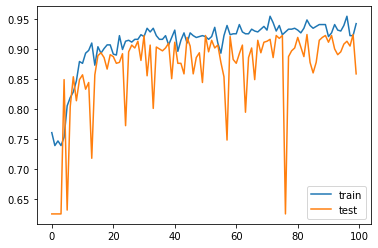

In [149]:
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy and training accuracy')
plt.legend()
plt.show()

### in Summary: 
* the validation accuracy has been significentky increased with smaller batch size and more convulution layers. The dropout layers have to reduce the overfitting.
* This model can be saved for future transfer learning in predicting medical scan images 